In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random

# Prepare Data

In [2]:
import json, gzip
TRAIN_DEV_SPLIT = 50000

# LOAD DATA
train = []
test = []

with gzip.open('mnist_rowmajor.jsonl.gz') as file:
    for sample in [json.loads(line) for line in file]:
        img = np.array(sample['image']).reshape((28,28))
        img_pts = []
        for x in range(28):
            for y in range(28):
                z = img[x][y]
                img_pts.append((x,y,z))
        label = sample['label']
        
        dataset = train if sample['split'] == 'train' else test
        dataset.append((img_pts, label))

dev = train[TRAIN_DEV_SPLIT:]
train = train[:TRAIN_DEV_SPLIT]

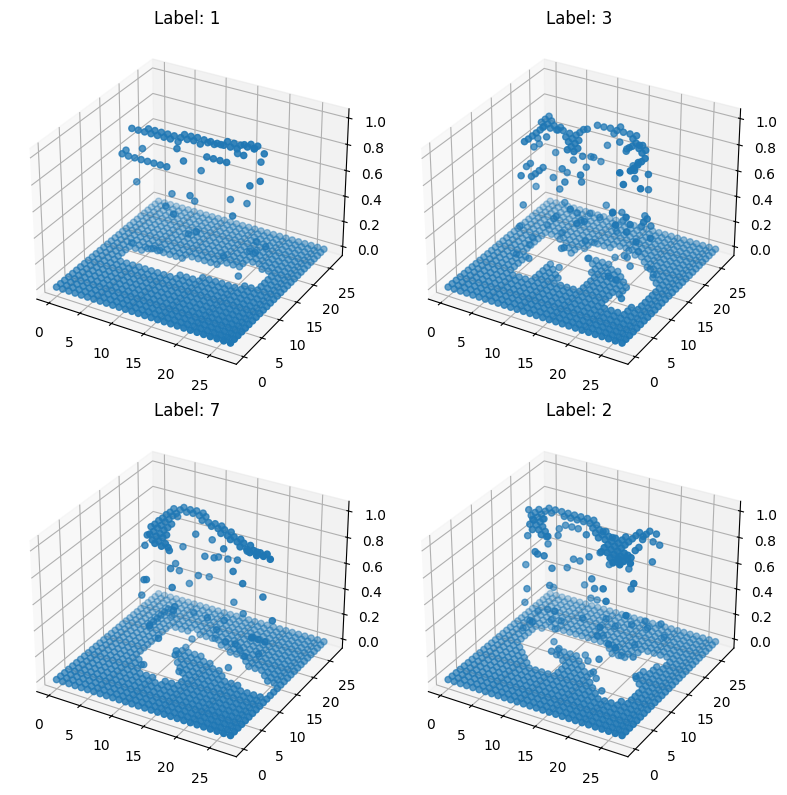

In [3]:
fig = plt.figure(figsize=(8,8))
for i in range(4):
    pts = train[i][0]
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_title(f'Label: {train[i][1]}')
    ax.scatter([p[0] for p in pts], [p[1] for p in pts], [p[2] for p in pts])
plt.tight_layout()
plt.show()

# Create Clusters

In [4]:
def distance(p, q):
    return (p[0] - q[0])**2 + (p[1] - q[1])**2 + (p[2] - q[2])**2

In [5]:
def lloyd_single(K: int):
    # initialize cluster centers
    centers = [ (randint(0,27),randint(0,27),random()) for k in range(K) ]
    # repeat until convergence
    while True:
        # assign every point to nearest clutser
        S = [[] for k in range(K)]
        for pt in train[0][0]:
            nearest_K = np.argmin([ distance(pt, centers[k]) for k in range(K) ])
            S[nearest_K].append(pt)
        # get mean for each cluster
        prev_centers = centers.copy()
        for k in range(K):
            k_size = len(S[k])
            if k_size == 0:
                continue
            k_sum_x = sum([ pt[0] for pt in S[k] ])
            k_sum_y = sum([ pt[1] for pt in S[k] ])
            k_sum_z = sum([ pt[2] for pt in S[k] ])
            centers[k] = [ k_sum_x/k_size, k_sum_y/k_size, k_sum_z/k_size ]
        # check convergence
        if centers == prev_centers:
            return S, centers

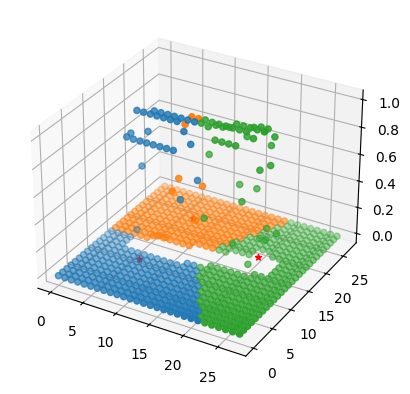

In [6]:
S, centers = lloyd_single(3)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for k in range(len(S)):
    ax.scatter([p[0] for p in S[k]], [p[1] for p in S[k]], [p[2] for p in S[k]])
for k in range(len(S)):
    ax.scatter(centers[k][0], centers[k][1], centers[k][2], c='red', marker='*')

plt.tight_layout()
plt.show()